# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [43]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
for city in cities:
    print(city)

Number of cities in the list: 629
daru
vila franca do campo
albany
taksimo
avarua
adamstown
villa gesell
puerto natales
enewetak
longyearbyen
rundu
dauphin
bredasdorp
port-aux-francais
carnarvon
yellowknife
cidreira
ushuaia
porto novo
tura
oualidia
blackmans bay
labrador city
edinburgh of the seven seas
ilulissat
barranca
aasiaat
bethel
penon blanco
grytviken
invercargill
griffith
fada
stanley
el porvenir
ivins
gebeit
san sebastian de la gomera
fuglafjordur
masina
dubbo
ust-nera
papatowai
greenville
hasaki
port elizabeth
mar del plata
boa vista
harper
moissala
labytnangi
ribeira grande
ternate
fannuj
roshchino
waitangi
teguise
luanda
atafu village
flying fish cove
jamestown
tiksi
srednebelaya
pelabuhanratu
torit
sequim
udachny
smach mean chey
howard springs
puerto baquerizo moreno
shingu
hithadhoo
hamilton
constantia
qaqortoq
papao
egilsstadir
maragogi
whitehorse
mil'kovo
taiohae
afif
kavieng
dzuunharaa
arraial do cabo
barra de santo antonio
hobyo
fiumicino-isola sacra
hermanus
punta a

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [44]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# API key (Replace with your actual API key)
api_key = "8bc3cb858a9c4013b78392612fb2ff37"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&units=metric&appid={api_key}"
    
    # Make API request
    city_weather = requests.get(city_url).json()

    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Store the city weather data in a dictionary
        city_weather_data = {
            "City": city,
            "Latitude": city_lat,
            "Longitude": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        }
        
        # Append the city information to city_data list
        city_data.append(city_weather_data)

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | daru
Processing Record 2 of Set 1 | vila franca do campo
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | taksimo
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | villa gesell
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | enewetak
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | rundu
Processing Record 12 of Set 1 | dauphin
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | porto novo
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | oualidia
City not found. Skipping...
Processing Record 22 of Set 1 | bl

In [45]:
# Convert the cities weather data list into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

# Show Record Count
city_data_df.count()

City          601
Latitude      601
Longitude     601
Max Temp      601
Humidity      601
Cloudiness    601
Wind Speed    601
Country       601
Date          601
dtype: int64

In [46]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,daru,-9.0763,143.2092,27.66,83,86,2.51,PG,1744774756
1,vila franca do campo,37.7167,-25.4333,16.23,92,43,3.84,PT,1744774757
2,albany,42.6001,-73.9662,5.23,73,81,0.45,US,1744774759
3,taksimo,56.3444,114.8794,2.75,69,100,1.06,RU,1744774760
4,avarua,-21.2078,-159.7750,27.03,69,75,4.12,CK,1744774761


In [48]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [49]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,daru,-9.0763,143.2092,27.66,83,86,2.51,PG,1744774756
1,vila franca do campo,37.7167,-25.4333,16.23,92,43,3.84,PT,1744774757
2,albany,42.6001,-73.9662,5.23,73,81,0.45,US,1744774759
3,taksimo,56.3444,114.8794,2.75,69,100,1.06,RU,1744774760
4,avarua,-21.2078,-159.7750,27.03,69,75,4.12,CK,1744774761


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

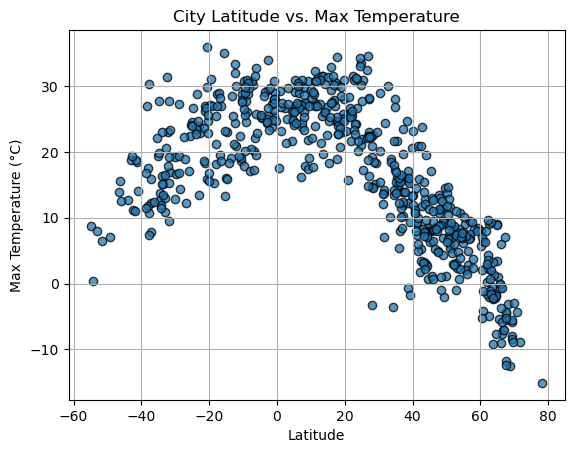

In [51]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Latitude"], city_data_df["Max Temp"], marker="o", edgecolor='black', alpha=.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

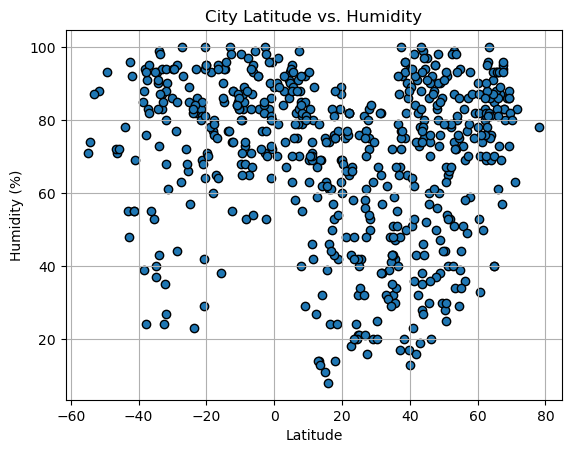

In [53]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Latitude"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

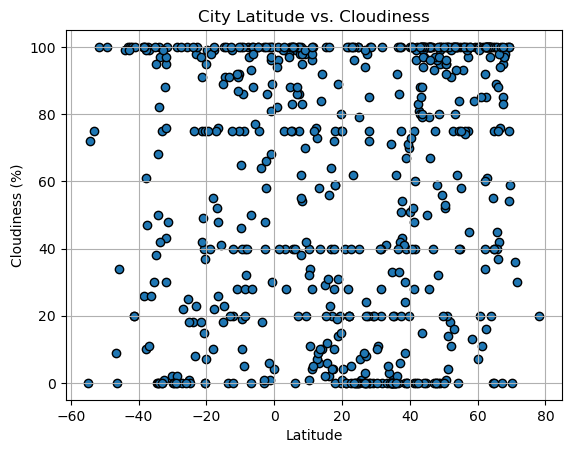

In [54]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Latitude"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

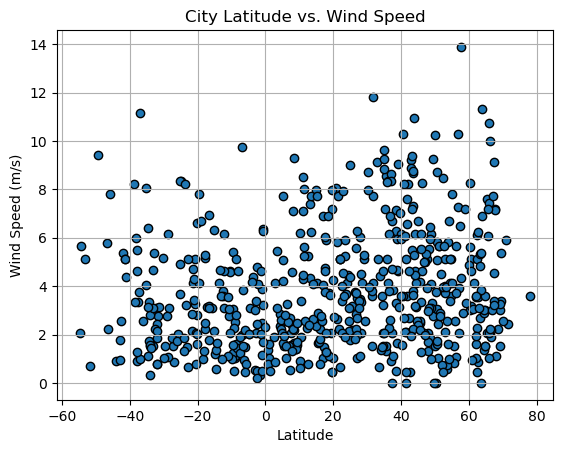

In [55]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Latitude"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [68]:
# Define a function to create Linear Regression plots
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    # Calculate regression values
    regress_values = x_values * slope + intercept

In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Latitude"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vila franca do campo,37.7167,-25.4333,16.23,92,43,3.84,PT,1744774757
2,albany,42.6001,-73.9662,5.23,73,81,0.45,US,1744774759
3,taksimo,56.3444,114.8794,2.75,69,100,1.06,RU,1744774760
8,enewetak,11.3474,162.3373,27.48,80,100,8.03,MH,1744774765
9,longyearbyen,78.2186,15.6401,-15.09,78,20,3.60,SJ,1744774767


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Latitude"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,daru,-9.0763,143.2092,27.66,83,86,2.51,PG,1744774756
4,avarua,-21.2078,-159.7750,27.03,69,75,4.12,CK,1744774761
5,adamstown,-25.0660,-130.1015,24.57,85,1,4.93,PN,1744774762
6,villa gesell,-37.2639,-56.9730,12.30,83,100,3.76,AR,1744774763
7,puerto natales,-51.7236,-72.4875,6.47,88,100,0.71,CL,1744774764


###  Temperature vs. Latitude Linear Regression Plot

In [69]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Max Temp"]
    # Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    
    # Calculate regression values
regress_values = x_values * slope + intercept
r_squared = r_value ** 2
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
# Create the plot
plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values, regress_values, color='red', label='Regression Line')
plt.annotate(line_eq, xy=(x_values.max()*0.7, y_values.max()*0.9), fontsize=12,color="red")

# Label the plot
plt.title("Northern Hemisphere: Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)


# Show the plot
print(f"The r^2-value is: {r_squared}")
plt.show()

NameError: name 'stats' is not defined

In [62]:
# Linear regression on Southern Hemisphere - Temperature vs. Latitude
print("A strong positive correlation is expected—lower latitudes tend to have higher temperatures.")
plot_linear_regression(
    southern_hemi_df["Latitude"],
    southern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temperature (°C)",
    "Southern Hemisphere: Temperature vs. Latitude"
)

A strong positive correlation is expected—lower latitudes tend to have higher temperatures.


TypeError: plot_linear_regression() takes 4 positional arguments but 5 were given

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [63]:
# Linear regression on Northern Hemisphere - Humidity vs. Latitude
print("The correlation between latitude and humidity in the Northern Hemisphere may be weak or inconsistent.")
plot_linear_regression(
    northern_hemi_df["Latitude"],
    northern_hemi_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "Northern Hemisphere: Humidity vs. Latitude"
)

The correlation between latitude and humidity in the Northern Hemisphere may be weak or inconsistent.


TypeError: plot_linear_regression() takes 4 positional arguments but 5 were given

In [64]:
# Linear regression on Southern Hemisphere - Humidity vs. Latitude
print("Humidity levels in the Southern Hemisphere may not have a strong correlation with latitude, as regional factors like ocean proximity and climate patterns play a significant role.")
plot_linear_regression(
    southern_hemi_df["Latitude"],
    southern_hemi_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "Southern Hemisphere: Humidity vs. Latitude"
)

Humidity levels in the Southern Hemisphere may not have a strong correlation with latitude, as regional factors like ocean proximity and climate patterns play a significant role.


TypeError: plot_linear_regression() takes 4 positional arguments but 5 were given

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [65]:
# Linear regression on Northern Hemisphere - Cloudiness vs. Latitude
print("Cloudiness in the Northern Hemisphere may not show a strong correlation with latitude, as cloud cover is influenced by regional climate conditions and seasonal variations.")
plot_linear_regression(
    northern_hemi_df["Latitude"],
    northern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "Northern Hemisphere: Cloudiness vs. Latitude"
)

Cloudiness in the Northern Hemisphere may not show a strong correlation with latitude, as cloud cover is influenced by regional climate conditions and seasonal variations.


TypeError: plot_linear_regression() takes 4 positional arguments but 5 were given

In [66]:
# Linear regression on Southern Hemisphere - Cloudiness vs. Latitude
print("Cloudiness in the Southern Hemisphere may not show a strong correlation with latitude, as cloud cover is influenced by local weather patterns and atmospheric conditions.")
plot_linear_regression(
    southern_hemi_df["Latitude"],
    southern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "Southern Hemisphere: Cloudiness vs. Latitude"
)

Cloudiness in the Southern Hemisphere may not show a strong correlation with latitude, as cloud cover is influenced by local weather patterns and atmospheric conditions.


TypeError: plot_linear_regression() takes 4 positional arguments but 5 were given

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere - Wind Speed vs. Latitude
print("Wind speed in the Northern Hemisphere may not show a strong correlation with latitude, as wind patterns are influenced by geographic features and atmospheric conditions.")
plot_linear_regression(
    northern_hemi_df["Latitude"],
    northern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed (m/s)",
    "Northern Hemisphere: Wind Speed vs. Latitude"
)

Wind speed in the Northern Hemisphere may not show a strong correlation with latitude, as wind patterns are influenced by geographic features and atmospheric conditions.


NameError: name 'northern_hemi_df' is not defined

In [ ]:
# Linear regression on Southern Hemisphere - Wind Speed vs. Latitude
print("Wind speed in the Southern Hemisphere may not show a strong correlation with latitude, as wind patterns are influenced by geographic features and atmospheric conditions.")
plot_linear_regression(
    southern_hemi_df["Latitude"],
    southern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed (m/s)",
    "Southern Hemisphere: Wind Speed vs. Latitude"
)

Wind speed in the Southern Hemisphere may not show a strong correlation with latitude, as wind patterns are influenced by geographic features and atmospheric conditions.


NameError: name 'southern_hemi_df' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE